plot SIC from the MASAM2: Daily 4 km Arctic Sea Ice Concentration, Version 1 data set. 

data can be accessed from: ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G10005/

Please refer to the following data set web page for documentation and citation information:
https://nsidc.org/data/g10005

k.drushka // feb 2022

In [22]:
import sys
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker

import glob
import numpy as np
import nctoolkit as nc

import cartopy

nctoolkit is using Climate Data Operators version 1.9.9


In [7]:
ddir = '/data1/sassie/satellite/seaice/masam2/'
files = glob.glob(ddir + "*nc")

In [9]:
ds = xr.open_mfdataset(files)
ds

<xarray.Dataset>
Dimensions:                (t: 28, x: 2100, y: 2550)
Dimensions without coordinates: t, x, y
Data variables:
    Longitude              (y, x) float32 dask.array<chunksize=(2550, 2100), meta=np.ndarray>
    Latitude               (y, x) float32 dask.array<chunksize=(2550, 2100), meta=np.ndarray>
    Day_of_Month           (t) int32 dask.array<chunksize=(28,), meta=np.ndarray>
    Sea_Ice_Concentration  (t, y, x) int8 dask.array<chunksize=(28, 2550, 2100), meta=np.ndarray>

<xarray.DataArray 'Day_of_Month' ()>
dask.array<getitem, shape=(), dtype=int32, chunksize=(), chunktype=numpy.ndarray>
Attributes:
    units:      day_of_month
    long-name:  Day_of_Feb_2022

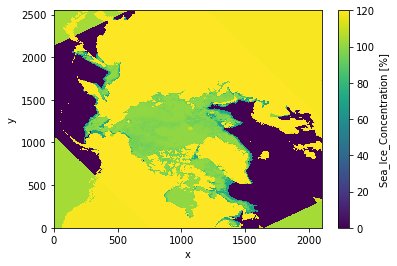

In [45]:
ti = -3 
# plt.plot(ds.Sea_Ice_Concentration.isel(t=ti).data)
# plt.show()


ds.Sea_Ice_Concentration.isel(t=ti).plot()
ds.Day_of_Month.isel(t=ti)

In [47]:
ds.Day_of_Month.isel(t=ti).values

array(26, dtype=int32)

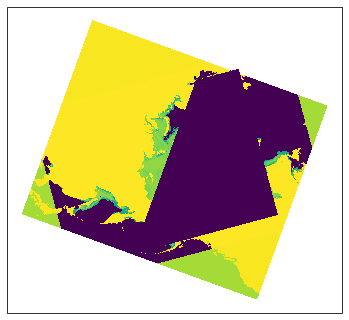

In [18]:
# index of time to plot
ti = 1

fig, ax1 = plt.subplots(1,1, 
        subplot_kw={'projection': ccrs.NorthPolarStereo(central_longitude=-150)}, 
        figsize=(6,6))

pc = ax1.pcolormesh(ds.Longitude, ds.Latitude, ds.Sea_Ice_Concentration.isel(t=ti),
                   transform=ccrs.PlateCarree())

# #  ----- map stuff
# ax1.coastlines(color='none')  # coastline
# ax1.set_extent([-170, -130,68, 80], crs=ccrs.PlateCarree())
# gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.3)
# # ax1.set_title()
# plt.colorbar(pc, ax=ax1, orientation="horizontal", pad=0.05).set_label('SIC')
# # land color
# ax1.add_feature(cartopy.feature.LAND , facecolor=(.7,.7,.7))
# # ticks
# gl.ylocator = mticker.FixedLocator([68, 70, 72, 74, 76, 78])
# gl.xlocator = mticker.FixedLocator([-170, -160, -150, -140, -130])
# gl.top_labels = False
# gl.bottom_labels = True